# Introduction

In this example we will use cluster analysis to analyze some data. Cluster analysis is an unsupervised learning ML algorithm. It involves placing objects in groups such that objects in a group are similar to onother but different/unrelated to objects in other groups.

K-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into k-disjoint clusters by iteratively

- Form k clusters by assigning each cluster to its nearest centroid
- Recompute the centroid of each cluster

## Steps Taken
- First step will be to generate the data to be used for cluster analysis - the data will have normal distribution centered [16,14] [10,6] [14,14].
- Visualize the data, to see how the data is distributed.
- Find the number of clusters that will be appropriate using the elbow method.
 - Plot the elbow graph to view the appropriate value of k.
- Use k-means clustering to find the centroids of each of the clusters.
- Visualize the clusters with the centroids for better display of the data.

In [1]:
# Filter out unnecesary errors
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Import some of the libraries that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline

##  Generate the data

The data will have normal distribution, with the means defined below and a uniform covariance

In [3]:
N = 1500

In [4]:
mean1 = [6,14]
mean2 = [10,6]
mean3 = [14,14]
cov = [[3.5,0], [0,3.5]]

In [5]:
np.random.seed(50)

In [6]:
x =np.random.multivariate_normal(mean1, cov, int(N/6))

In [7]:
x.shape

(250, 2)

In [8]:
x =np.concatenate((x, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [9]:
x.shape

(500, 2)

In [10]:
x =np.concatenate((x, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [11]:
x.shape

(750, 2)

In [12]:
y = (np.ones(int(N)))

In [13]:
y

array([1., 1., 1., ..., 1., 1., 1.])

## Visualize the data

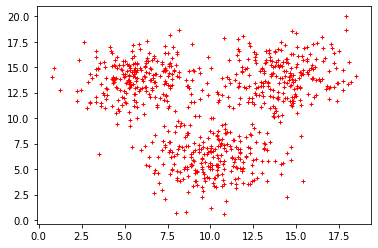

In [14]:
plt.plot(x[:int(N/2), 0], x[:int(N/2),1], 'r+', ms=4)

As shown above, the data distribution on the plot shows that the data could possibly be grouped into three distinct groups or clusters. Now we use cluster analysis to check what would be the best number of clusters to group the data into. We will see if the results are similar to the current observation of 3 clusters.

## Use the Elbow method to find the number of clusters

The elbow method uses the sum of squared error for each number of clusters, and uses that to determine the best number of clusters to be picked.

In [15]:
from sklearn import cluster

In [16]:
numClusters = [1,2,3,4,5,6]

In [17]:
# declare SSE as an empty list. SSE is Sum of the squared error
SSE = []

# Loop through the numClusters array, using each of the numbers as the number of clusters.
# k_means.inertia_ gives the sum of squared errors
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(x)
    SSE.append(k_means.inertia_)

In [18]:
SSE

[24118.7207094972,
 13627.031960680926,
 5116.338694781712,
 4394.425801484561,
 3790.192580737591,
 3278.16434527811]

### Plot the Elbow

Text(0, 0.5, 'SSE')

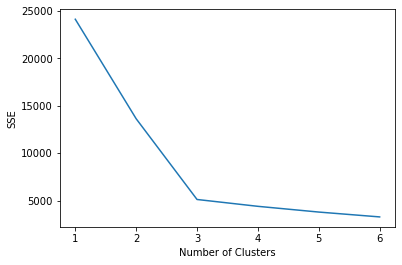

In [19]:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

As shown above, the best number of clusters is 3.

## Apply k-means clustering using the value of k from elbow

In [20]:
x

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [12.5060124 , 11.43368649],
       [12.96938736, 13.11733316],
       [16.06699074, 14.97152845]])

Convert the data from array type to a dataframe for easier working

In [21]:
df = pd.DataFrame(data=x, columns=['Col-1', 'Col-2'])

In [22]:
df.head()

,Col-1,Col-2
0,3.080849,13.942046
1,4.838349,11.260021
2,8.641509,13.108116
3,4.539876,16.002288
4,3.601050,11.516514


In [23]:
# Define the model.

In [24]:
k_means = cluster.KMeans(n_clusters=3, max_iter=100, random_state=1)

In [25]:
# Fit the data to the model.

In [26]:
k_means.fit(df)

KMeans(max_iter=100, n_clusters=3, random_state=1)

In [27]:
labels = k_means.labels_

In [28]:
cluster_data = pd.DataFrame(labels, columns=['Cluster ID'])

In [29]:
cluster_data.sample(7)

,Cluster ID
163,0
114,0
64,0
159,0
409,2
41,2
674,1


There are three clusters 0, 1 and 2

In [30]:
# Add the new column of Cluster_ID to the dataframe.
# Display the dataframe.

df['Cluster_ID'] = cluster_data

In [31]:
df.sample(7)

,Col-1,Col-2,Cluster_ID
299,10.238317,4.108938,2
438,10.682141,9.289624,2
630,16.690237,15.852277,1
437,14.111697,4.535391,2
42,5.627612,14.655596,0
187,8.701464,11.051829,0
542,13.912174,11.861407,1


After picking a sample from the data, we can see that there are three clusters with IDs 0, 1 and 2. The fist entries of index 1 to 249 belong to cluster 0, Form index 250 - 499 belong to cluster 2 and the data from index 500 onwards belong to cluster 1. 

### Find the centroids for Each Cluster

In [32]:
centroids = k_means.cluster_centers_

In [33]:
centroids

array([[ 5.84742828, 13.8415819 ],
       [14.14705418, 14.06272164],
       [10.0828762 ,  6.06371255]])

The values of the centroids above are very close to the means defined when creating the data i.e.
- [6, 14]  [ 5.84742828, 13.8415819 ]

- [14, 14] [14.14705418, 14.06272164]

- [10, 6]  [10.0828762 ,  6.06371255]

## Visualize the Clusters and Centroids

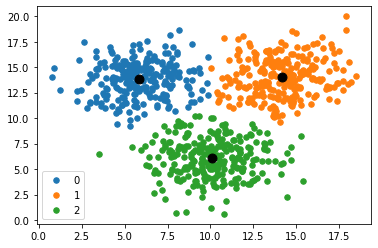

In [34]:
label = k_means.fit_predict(x)

# Select Unique Labels
u_labels = np.unique(label)
 
# plotting the results:
 
for i in u_labels:
    plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i, s=30)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

The data is plotted above with the centroid shown in the middle of the cluster with the black spot. 